In [68]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from itertools import chain


In [69]:
# Definimos nuestro algoritmo de búsqueda:

def busqueda_amplitud(grafo, inicio, objetivo):
    resultados = []
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        print("\nIteración:", i)
        print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            print("Camino encontrado:", "->".join(camino))
            resultados.append(camino)
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    # print("No se encontró un camino al nodo objetivo.")
    return resultados

In [70]:
def flatten_list(l):
    return set(chain.from_iterable(l))


In [71]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'E'],
    'C': ['A', 'E'],
    'D': ['A', 'F'],
    'E': ['B', 'C'],
    'F': ['D']
    }

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'E'

# Realizamos la búsqueda en amplitud
caminos = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)

print("caminos: ", caminos)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']
Nueva ruta: ['A', 'D']

Iteración: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Nueva ruta: ['A', 'B', 'E']

Iteración: 3
Nodo actual: C
Nodos visitados {'A', 'C', 'B'}
Nueva ruta: ['A', 'C', 'E']

Iteración: 4
Nodo actual: D
Nodos visitados {'A', 'D', 'C', 'B'}
Nueva ruta: ['A', 'D', 'F']

Iteración: 5
Nodo actual: E
Camino encontrado: A->B->E
Nodos visitados {'A', 'C', 'B', 'D', 'E'}

Iteración: 6
Nodo actual: E
Camino encontrado: A->C->E

Iteración: 7
Nodo actual: F
Nodos visitados {'A', 'C', 'B', 'F', 'D', 'E'}
caminos:  [['A', 'B', 'E'], ['A', 'C', 'E']]


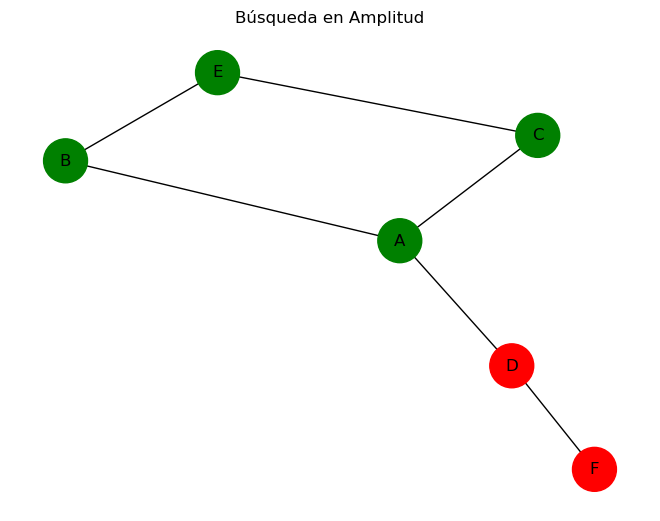

In [72]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en el camino o no
colores = ['green' if nodo in flatten_list(caminos) else 'red' for nodo in G.nodes()]

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()

In [73]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A'],
    'D': ['B'],
    'E': ['B', 'F', 'G'],
    'F': ['E'],
    'G': ['E']
    }

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'F'

# Realizamos la búsqueda en amplitud
caminos = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)

print("caminos: ", caminos)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']

Iteración: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Nueva ruta: ['A', 'B', 'D']
Nueva ruta: ['A', 'B', 'E']

Iteración: 3
Nodo actual: C
Nodos visitados {'A', 'C', 'B'}

Iteración: 4
Nodo actual: D
Nodos visitados {'A', 'D', 'C', 'B'}

Iteración: 5
Nodo actual: E
Nodos visitados {'A', 'C', 'B', 'D', 'E'}
Nueva ruta: ['A', 'B', 'E', 'F']
Nueva ruta: ['A', 'B', 'E', 'G']

Iteración: 6
Nodo actual: F
Camino encontrado: A->B->E->F
Nodos visitados {'A', 'C', 'B', 'F', 'D', 'E'}

Iteración: 7
Nodo actual: G
Nodos visitados {'A', 'C', 'B', 'F', 'G', 'D', 'E'}
caminos:  [['A', 'B', 'E', 'F']]


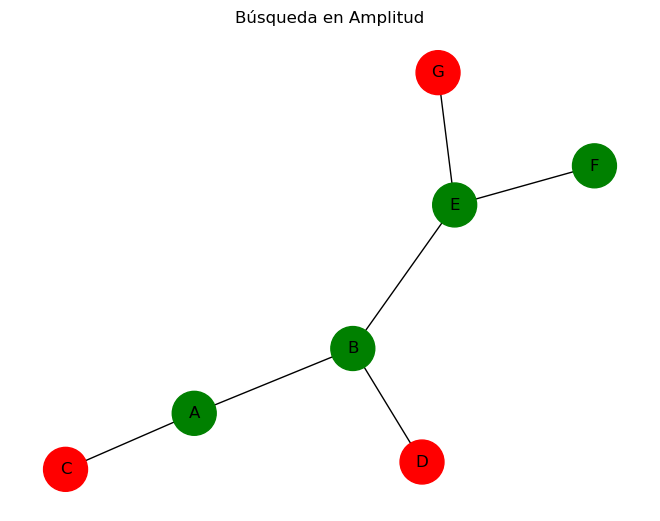

In [74]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en el camino o no
colores = ['green' if nodo in flatten_list(caminos) else 'red' for nodo in G.nodes()]

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()